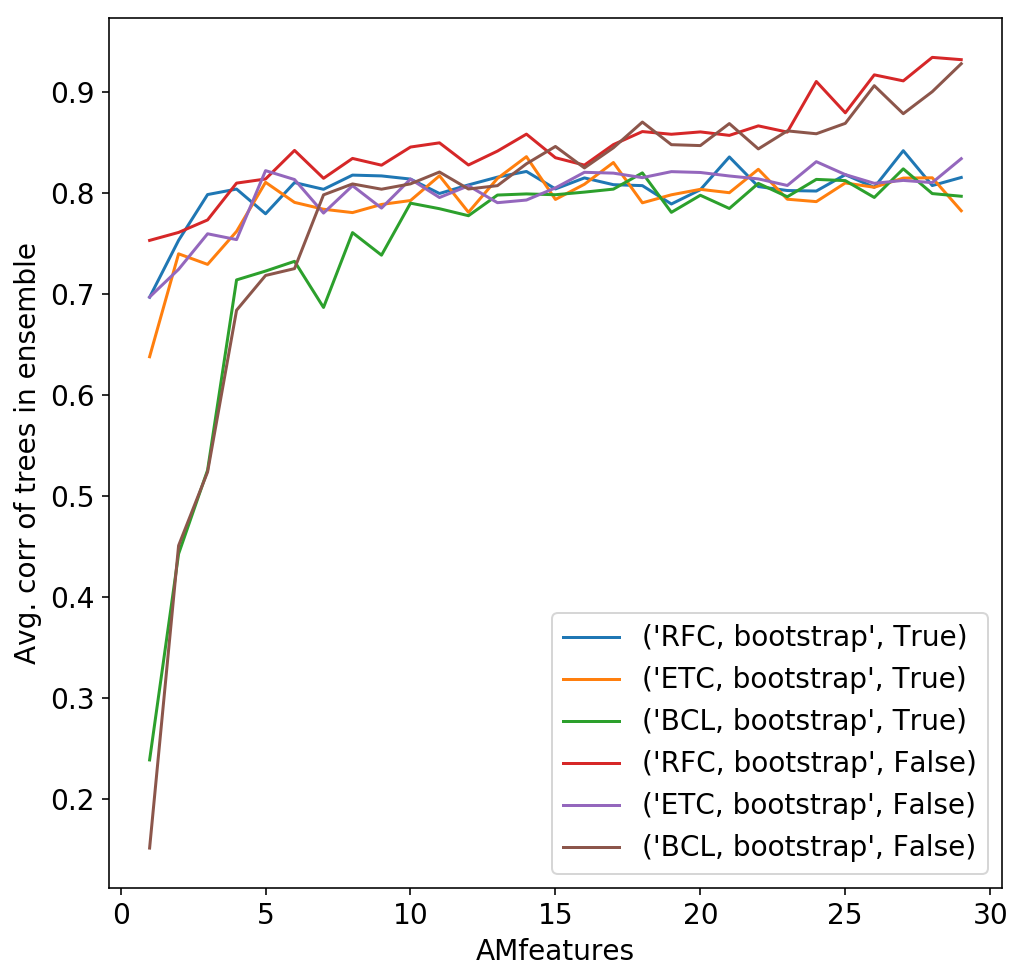

In [112]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=666)
max_features = X.shape[1]

for bts in [True, False]:
    c_rfc = []
    c_etc = []
    c_bcl = []
    f = []
    for features in range(1, max_features):
        
        rfc = RandomForestClassifier(n_estimators=10, max_features=features, bootstrap=bts, random_state=555)
            # There's something I don't understand about the max_features choice in BraggingClassifier
        bcl = BaggingClassifier(n_estimators=10, max_features=features, bootstrap=bts)
        etc = ExtraTreesClassifier(n_estimators=10, max_features=features, bootstrap=bts, random_state=555)
        
        rfc.fit(X_train, y_train)
        etc.fit(X_train, y_train)
        bcl.fit(X_train, y_train)
        
        rfc_corr = 0.
        etc_corr = 0.
        bcl_corr = 0.
        n = 0;
        
        for i in range(10):
            for j in range(10):
                if (j >= i) : 
                    break
                rfc_re1 = rfc.estimators_[i]
                rfc_re2 = rfc.estimators_[j]
                rfc_corr += np.corrcoef(rfc_re1.predict_proba(X_test)[:,0], rfc_re2.predict_proba(X_test)[:,0])[0, 1]
                etc_re1 = etc.estimators_[i]
                etc_re2 = etc.estimators_[j]
                etc_corr += np.corrcoef(etc_re1.predict_proba(X_test)[:,0], etc_re2.predict_proba(X_test)[:,0])[0, 1]
                
                bcl_re1 = bcl.estimators_[i];
                bcl_re2 = bcl.estimators_[j];
                bcl_corr += np.corrcoef(bcl_re1.predict_proba(X_test[:, bcl.estimators_features_[i]])[:,0], bcl_re2.predict_proba(X_test[:, bcl.estimators_features_[j]])[:,0])[0, 1]
                n += 1
        
        c_rfc.append(rfc_corr/n)
        c_etc.append(etc_corr/n)
        c_bcl.append(bcl_corr/n)
        f.append(features)
    plt.plot(f, c_rfc, label=("RFC, bootstrap", bts))
    plt.plot(f, c_etc, label=("ETC, bootstrap", bts))
    plt.plot(f, c_bcl, label=("BCL, bootstrap", bts))
    plt.xlabel("AMfeatures")
    plt.ylabel("Avg. corr of trees in ensemble")
    plt.legend(loc='best')


In [99]:
# How do we choose a random split point? Isn't this determined by the criterion i.e. gini or entropy?